In [4]:
# utilizando z-score para encontrar outliers
# o pacote scipy possui um método para encontrar o z-score

from scipy.stats import zscore
import pandas as pd
import numpy as np


X = pd.read_csv("blobs2.csv")

# calculando z-scores
Xzscore = zscore(X,axis=0)

# encontrando outliers
outliers = np.abs(Xzscore) > 2.8 # 2.8 é o threshold utilizado para 
                                 # identificar um valor como outlier
    
outliers_id = np.argwhere(outliers == True)
print('indice das linhas dos elementos "outliers":\n',outliers_id)
# removendo outliers
df = pd.DataFrame(data=X)
print(df.shape)
df = df.drop(outliers_id[:,0],axis=0)
print(df.shape)

X_no_outliers = df.values

indice das linhas dos elementos "outliers":
 [[116  13]
 [240  16]
 [286   5]
 [298  17]
 [398   6]]
(600, 25)
(595, 25)


In [6]:
from sklearn.decomposition import PCA
pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X)
percentage_info = 0.0
for i in range(2):
    percentage_info += X_transformed.explained_variance_ratio_[i]
print(percentage_info)


0.41111814036537475


In [7]:
from sklearn.decomposition import PCA
pca_obj=PCA(svd_solver='full')
X_transformed = pca_obj.fit(X_no_outliers)
percentage_info = 0.0
for i in range(2):
    percentage_info += X_transformed.explained_variance_ratio_[i]
print(percentage_info)

0.7526760714065046


(595, 2)


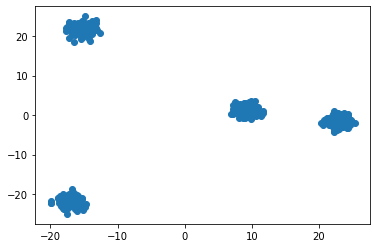

In [10]:
import matplotlib.pyplot as plt
pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(X_no_outliers)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])